In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

In [3]:
scouted_data = load_scouted_data()
scouted_data

,Scouter Initials,Match Number,Team Number,No Show,Auto Fuel,Auto Climbing Status,Teleop Fuel,Teleop Fuel Passed,Endgame Climbing Level
0,abc,1,1678,True,14,True,183,97,NaN
1,abc,1,3504,True,10,False,81,83,NaN
2,abc,1,8393,True,0,False,45,126,L2
3,abc,1,118,True,16,True,77,100,L2
4,abc,1,254,True,2,False,135,153,NaN
5,abc,1,67,True,3,False,74,35,L1
6,abc,2,8393,True,6,True,153,123,L3
7,abc,2,2056,True,7,False,176,83,L2
8,abc,2,118,True,15,True,59,144,L1
9,abc,2,3504,True,30,True,154,29,L3


In [4]:
pit_data = load_pit_data()
pit_data

,Scouter Initials,Team Number,Intake,Climbing Level (Auto),Climbing Level (Endgame),Auto Start,Piece Auto,Climb type,Over Bumper?,Under Trench?,Carrying Capacity,Preload Number,Defense Skill (0-5)
0,abc,3504,Ground,1,1,right,16,in,True,False,8,8,2
1,abc,8393,Depot,0,2,right,6,in,False,True,12,6,1
2,abc,67,Ground,1,3,middle,3,out,True,True,6,3,4
3,abc,1678,Human Player Station,0,1,left,8,out,False,True,10,4,3
4,abc,118,Ground,1,1,left,0,in,True,True,10,0,5
5,abc,254,Human Player Station,1,0,middle,8,out,False,True,8,8,1
6,abc,2056,Depot,1,0,left,9,out,True,False,12,8,2


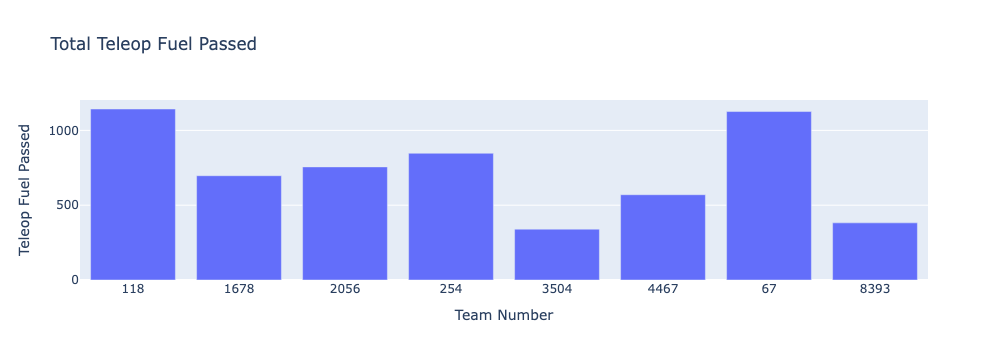

In [5]:
teleop_fuel_passed_df = scouted_data.groupby("Team Number")["Teleop Fuel Passed"].sum().reset_index()
fig = px.bar(teleop_fuel_passed_df, x="Team Number", y="Teleop Fuel Passed", title="Total Teleop Fuel Passed", 
             labels={"Total Teleop Fuel Passed": "total fuel passed"})
fig.show()

In [ ]:
teleop_fuel_passed_df = scouted_data.groupby("Team Number")["Teleop Fuel Passed"].mean().reset_index()
fig = px.bar(teleop_fuel_passed_df, x="Team Number", y="Teleop Fuel Passed", title="Average Teleop Fuel Passed", 
             labels={"Total Teleop Fuel Passed": "total fuel passed"})
fig.show()